### Practice from https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
https://towardsdatascience.com/machine-learning-techniques-applied-to-stock-price-prediction-6c1994da8001

Background knowledge on Time Series data:
1. A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. 
2. How to check stationary: rolling variance + rolling mean
3. How to make a time series stationanty?
    - what makes an TS not stationary
         1)Trend - varing mean
         2)Seasonality - variation at specific time-frames
         *)check stationality: test_stationarity(data)
    - How? the underlying principle is to model or estimate the trend and seasonality in the series and remove those series
        **Trend
         1)Moving average = take average of ‘k’ consecutive values depending on the frequency of time series -> subtract MA (pd.rolling_mean(data,#of previous data to be included)) from the data
        **Trend and Seasonality
         1)Differencing = taking the difference with a particular time lag: we take the difference of the observation at a particular instant with that at the previous instant (data.shift(# shift))
         2)Decomposition = modeling both trenda and seasonality and removing them from the model 
4. Predict TS:
    * ARIMA: 
        i) AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
        ii) MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
        iii) d: These are the number of nonseasonal differences
        *) how to decide p and q:
            i. (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. 
            ii. (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.
            *) p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
            *) q – The lag value where the ACF chart crosses the upper confidence interval for the first time.
         

Problem statement:
1. Fundamental Analysis = company's future profitbility on the basis of its current business environment and financial performance
2. **Technical Analysis = reading the charts and using statistical figures to identify the trends in the stock market

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import matplotlib

In [39]:
stock = pd.read_csv('stock price.csv')
stock.head(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


#### columns explained:
1. The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
2. High, Low and Last represent the maximum, minimum, and last price of the share for the day.
3. Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.
#### Notes
1. The market is closed on weekends and public holidays. 
2. Since the profit is determined by the closing price -> target variable: close price

In [54]:
stock = stock.sort_values('Date',ascending = True,axis = 0)
stock.index = stock['Date']
stock.index.name = None
stock.isnull().sum() 

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
Diff_Close              0
dtype: int64

In [55]:
#transform data as datetime object
stock['Date'] = pd.to_datetime(stock['Date'])
stock.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity           float64
Turnover (Lacs)                float64
Diff_Close                     float64
dtype: object

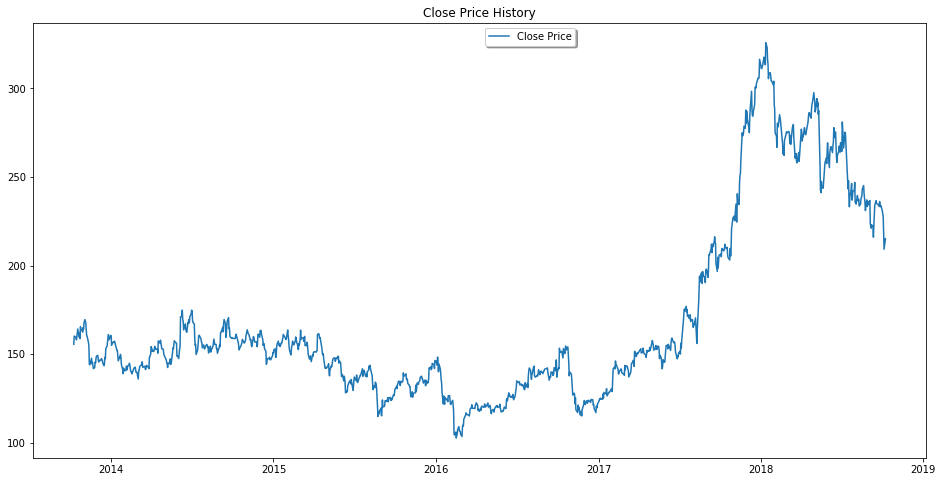

In [56]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(stock['Close'],label='Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

****insights:
1) the time series plot does not seem like stationary -> check the ACF plot
##### ACF explained: https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711#:~:text=The%20ACF%20plot%20was%20generated%20in%20python%20with,statsmodels.graphics.tsaplots%20import%20plot_acf.%20plot_acf%20%28data_a%2C%20lags%3D90%29%20%23data%20

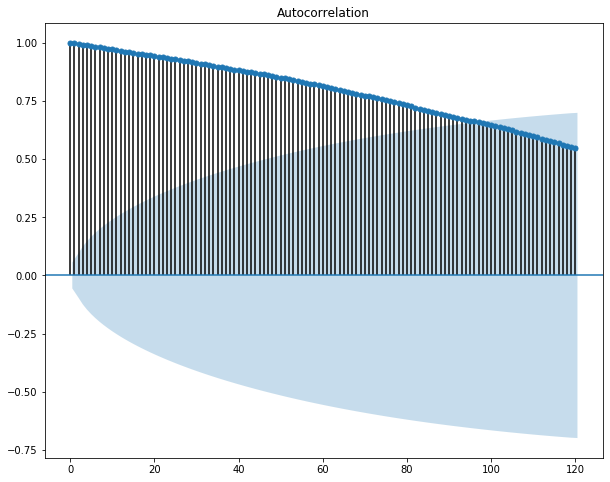

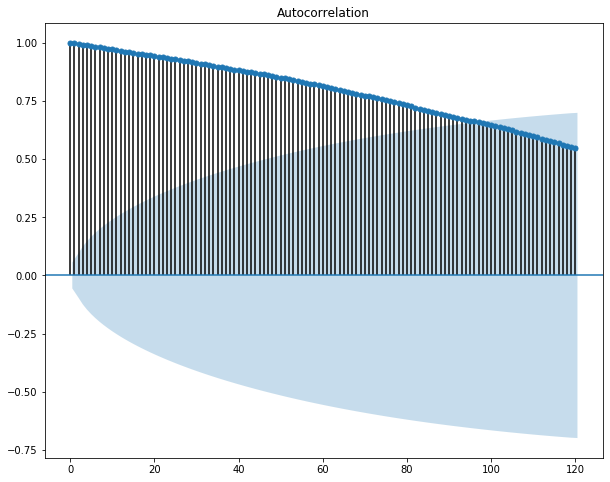

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock['Close'], lags=120)
#data: your time series
#lags: number of 'periods' you will like to investigate 

Interpretation of ACF plot:
1. cone pictures the confidence level (by default set to 95%)
2. bars show how much this past data influence the following ones
    * Roughly the current 100 data points shown in this ACF plot are within the blue shaded area, indicating significant influence - > we shall consider data points within 100 days
    * there is a gradual decrease of data point impact on future preduction, which is a normal case since newer data have more impact on current value -> 
        1) there is no cycle/seasonality, since we observe a constant decreasing bar heights 
        2) we did not observe negative bar height here, but if we did, a negative autocorrelation implies the newer value is more likely to be below average if a past value is above average  (or the other way round)

Bakcground Knowldge:
1. Augmented Dickey-Fuller Test is a common statistical test used to test whether a given Time series is stationary or not
    - Perform t-test to check stationary
        * Null Hypothesis: Time Series is stationary. It gives a time-dependent trend.
        * Alternate Hypothesis: Time Series is non-stationary. In another term, the series doesn’t depend on time.
        * ADF or t Statistic < critical values: Accept the null hypothesis. Time series is stationary.
        * ADF or t Statistic > critical values: Failed to reject the null hypothesis. The time series is non-stationary
    - Interpret result from adfuller result
        * result[0] = adf : float -> Test statistic
        * result[1] = pvalue : float -> MacKinnon’s approximate p-value based on MacKinnon (1994, 2010)
        * result[2] = usedlag : int -> Number of lags used
        * result[3] = nobs : int -> Number of observations used for the ADF regression and calculation of the critical values
        * result[4] = critical values : dict -> Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)
        * icbest : float -> The maximized information criterion if autolag is not None.

In [58]:
from statsmodels.tsa.stattools import adfuller
def check_stationaty(stock,target):
    t = stock[target].values
    timeseries = adfuller(t)
    print('ADF Statistic: %f' % timeseries[0])
    print('p-value: %f' % timeseries[1])
    print('Critical Values:')
    for key, value in timeseries[4].items():
         print('\t%s: %.3f' % (key, value))
    if timeseries[0] > timeseries[4]["5%"]:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
         print ("Reject Ho - Time Series is Stationary")
check_stationaty(stock,'Close')

ADF Statistic: -0.949886
p-value: 0.771101
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


In [59]:
#tranform by taking differenced stock price with the previous trading day
stock['Diff_Close'] = stock['Close'] - stock['Close'].shift(1)
stock = stock.dropna(axis=0,how='any')
check_stationaty(stock,'Diff_Close')

ADF Statistic: -9.155031
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


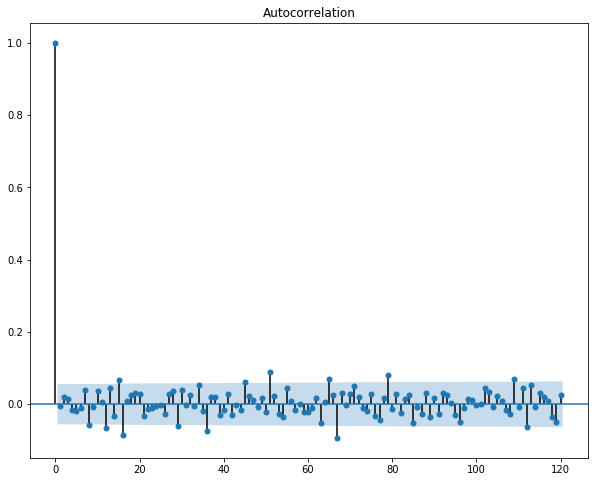

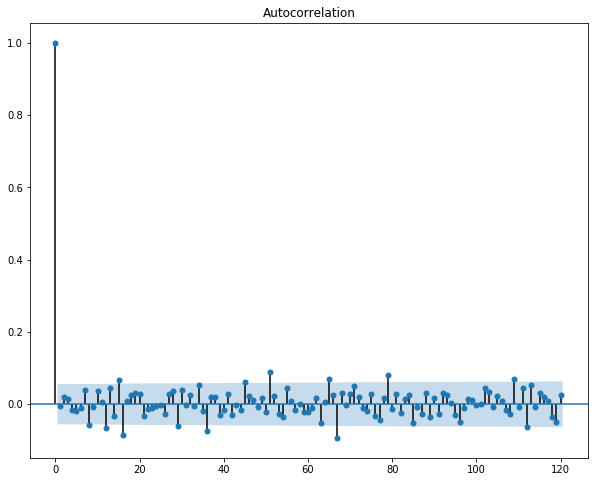

In [60]:
plot_acf(stock['Diff_Close'], lags=120)

****insight: ACF plot show stationality -> a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

##### Modeling - Moving Average - version 1
Moving Average = The predicted closing price for each day will be the average of a set of previously observed values. 

In [61]:
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Diff_Close
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80,4.60
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76,-0.10
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09,-0.60
2013-10-15,2013-10-15,160.00,160.20,155.35,157.10,158.05,1145582.0,1805.49,-1.40
2013-10-17,2013-10-17,159.10,162.90,158.25,161.75,162.00,2724697.0,4381.60,3.95
...,...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,-2.85
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,-3.30
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,-9.40
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,-9.00


In [62]:
#we train the model with Diff_Close to control heteroskedasticity
train=stock[['Date','Diff_Close','Close']][:int(stock.shape[0]*0.8)]
test=stock[['Date','Diff_Close','Close']][int(stock.shape[0]*0.8):]

In [63]:
def moving_average1(train,test):
    prediction = []
    for i in range(0,test.shape[0]):
        a = train['Diff_Close'][train.shape[0]-test.shape[0]+i:].sum() + sum(prediction)
        b = a/test.shape[0]
        prediction.append(b)
    return prediction

prediction = moving_average1(train,test)

In [64]:
pd.options.mode.chained_assignment = None 
#invert differencing transformation
pred_price = []
v0 = train.iloc[-1]['Close']
for i in range(test.shape[0]):
    diff = test['Diff_Close'].iloc[i]
    pred_price.append(v0+diff)
    v0=pred_price[-1]
test['Pred_Price'] = pred_price

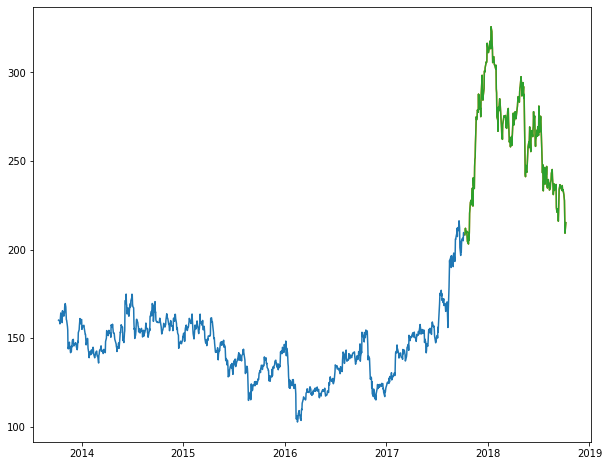

In [65]:
#visualize the result
plt.plot(train['Close'])
plt.plot(test[['Close','Pred_Price']])

In [66]:
#check accurary with RMSE
rms = np.sqrt(np.mean(np.power((np.array(test['Close'])-pred_price),2)))
print('RMS of Moving Average Model is {}'.format(rms))

RMS of Moving Average Model is 0.0


1. The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.
2. it is the most important criterion for fit if the main purpose of the model is prediction.

##### Modeling - Moving Average - version 2
https://towardsdatascience.com/machine-learning-techniques-applied-to-stock-price-prediction-6c1994da8001

In [67]:
def moving_average2(stock,target,n,predict_min,offset):
    predict_list = stock[target].rolling(window = n, min_periods=1).mean()
    #add one timestep in the predictions
    predict_list = np.concatenate((np.array([np.nan]),np.array(predict_list[:-1])))
    #if the values < predict_min, set it to predict_min
    #np array[conditions] -< return thesublist of the dataframe that satisfy that condition
    predict_list[predict_list<predict_min] = predict_min
    return predict_list[offset:]

#we use mean absolute percetage error (MAPE )
def get_MAPE(y_train,y_pred):
    y_train, y_pred = np.array(y_train),np.array(y_pred)
    return np.mean(np.abs((y_train-y_pred)/y_train))*100

def get_RMSE(y_train,y_pred):
    import math
    from sklearn.metrics import mean_squared_error
    y_train, y_pred = np.array(y_train),np.array(y_pred)
    return math.sqrt(mean_squared_error(y_pred, y_train))

In [68]:
#we split data into train 60%, valid 20%, test 20%
#-> train for model training, valid for hyperparameter tuning, test for evaluation
num_train = int(stock.shape[0]*0.6)
num_valid = int(stock.shape[0]*0.2)
num_test = stock.shape[0] - num_train - num_valid

test = stock[-num_test:]
train = stock[:num_train]
train_valid = stock[:num_valid+num_train]
valid = stock[num_train:num_valid+num_train]
print("Data Split Report: \n{} entries to trian; \n{} entries for parameter tuning; \n{} entries for model evalution".format(train.shape[0],valid.shape[0],test.shape[0]))

Data Split Report: 
739 entries to trian; 
246 entries for parameter tuning; 
248 entries for model evalution


Text(0, 0.5, 'Close')

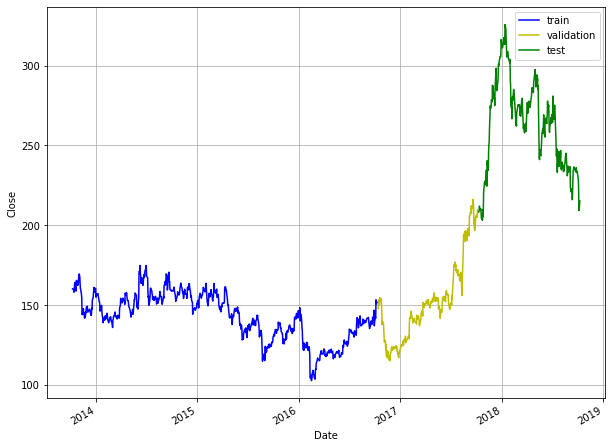

In [69]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='Date', y='Close', style='b-', grid=True)
ax = valid.plot(x='Date', y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test'])
ax.set_xlabel("Date")
ax.set_ylabel("Close")

In [70]:
RMSE = []
mape = []
for n in range(1,21):
    pred = moving_average2(train_valid,'Diff_Close',n,0,num_train)
    valid.loc[:, 'est' + '_N' + str(n)] = pred
    RMSE.append(get_RMSE(valid['Diff_Close'], pred))
    mape.append(get_MAPE(valid['Diff_Close'], pred))

/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

In [71]:
#invert differencing transformation
def transform_difference_by1(test,diff_col,newcol):
    pred_price = []
    v0 = train.iloc[-1]['Close']
    for i in range(test.shape[0]):
        diff = test[diff_col][i]
        pred_price.append(v0-diff)
        v0=pred_price[-1]
    test[newcol] = pred_price

In [72]:
RMSE = []
mape = []
for n in range(1,21):
    transform_difference_by1(valid,'est_N'+str(n),'est_N'+str(n)+' Price')
    RMSE.append(get_RMSE(valid['Close'], valid['est_N'+str(n)+' Price']))
    mape.append(get_MAPE(valid['Close'], valid['est_N'+str(n)+' Price']))

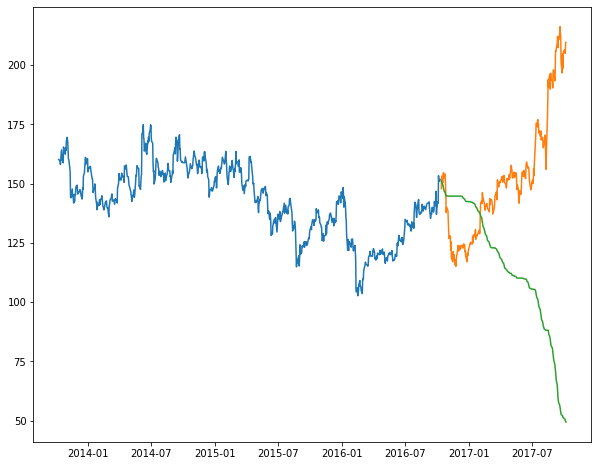

In [73]:
plt.plot(train['Close'])
plt.plot(valid[['Close','est_N20 Price']])

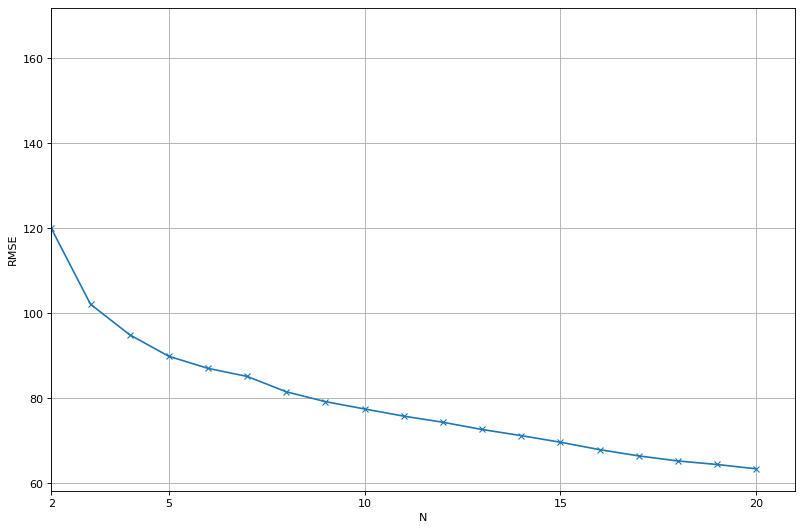

In [74]:
# Plot RMSE versus N
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, 20+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])
matplotlib.rcParams.update({'font.size': 14})

([<matplotlib.axis.XTick at 0x7fe5f85ac6d0>,
 <a list of 5 Text xticklabel objects>)

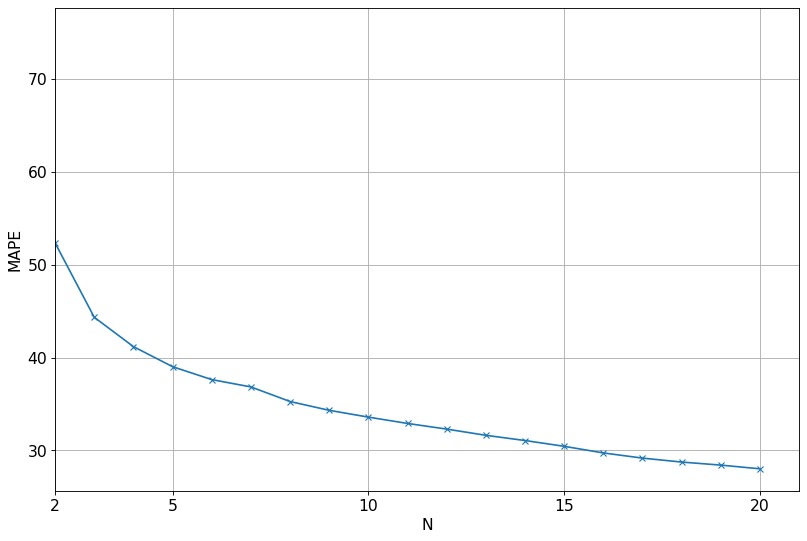

In [75]:
# Plot MAPE versus N. Note for MAPE smaller better. 
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, 20+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])

In [76]:
# Set optimum N
N_opt = 20

##### Modeling - Linear Regression
Moving Average = The predicted closing price for each day will be the average of a set of previously observed values. 

Background knowledge about Linear Regression:
0. Check whether overfitting: observe the error that the model produces on the training and testing set. If there is a large gap between both errors, where the training error is smaller than the testing error, the model is overfitting.
1. Regularization: In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j -> goal: to avoid overfitting; by: adding penalty term in our cosr function = regularization
    - How to reduce magnitude?
        i) Ridge: ridgeReg = sum of the squares of the coefficients to be small=Ridge(alpha=0.05, normalize=True) #changing alpha -> different performance -> magnitude of coefficient + R2 to check
                  ridgeReg.fit(x_train,y_train)
        ii)Lasso(Least Absolute Shrinkage Selector Operator) =sum of the absolute value of the coefficients to be small -> lasso selects the only some feature while reduces the coefficients of others to zero(because it uses absolute term)
            - It is generally used when we have more number of features, because it automatically does feature selection
        iii)elastic net regression, which is basically a hybrid of ridge and lasso regression.
            -Let’ say, we have a bunch of correlated independent variables in a dataset, then elastic net will simply form a group consisting of these correlated variables. Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.
            -ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False) : 
            * If l1_ratio =1, therefore if we look at the formula of l1_ratio, we can see that l1_ratio can only be equal to 1 
            * if a=1, which implies b=0. Therefore, it will be a lasso penalty.
            * Similarly if l1_ratio = 0, implies a=0. Then the penalty will be a ridge penalty.
            * For l1_ratio between 0 and 1, the penalty is the combination of ridge and lasso.



In [80]:
stock.index.name = None
stock_linear_data = stock.sort_values('Date',ascending = True,axis = 0)

In [81]:
stock_linear_data['weekday'] = stock_linear_data['Date'].dt.day_name()
def mon_fri(day):
    if day =='Monday' or day == 'Friday':
        return 1
    else:
        return 0
stock_linear_data['mon_fri'] = stock_linear_data['weekday'].apply(lambda x:mon_fri(x))
stock_linear_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Diff_Close,weekday,mon_fri
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80,4.60,Thursday,0
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76,-0.10,Friday,1
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09,-0.60,Monday,1
2013-10-15,2013-10-15,160.00,160.20,155.35,157.10,158.05,1145582.0,1805.49,-1.40,Tuesday,0
2013-10-17,2013-10-17,159.10,162.90,158.25,161.75,162.00,2724697.0,4381.60,3.95,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,-2.85,Monday,1
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,-3.30,Wednesday,0
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,-9.40,Thursday,0
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,-9.00,Friday,1


In [82]:
train = stock_linear_data[:int(stock_linear_data.shape[0]*0.8)]
test = stock_linear_data[int(stock_linear_data.shape[0]*0.8):]

In [83]:
import numpy as np
from sklearn.linear_model import LinearRegression

#offset = we only do the prediciton for data[offest:]
def get_pred_linear(data,target,n,pred_min,offset):
    #create a linear regression object
    linear_model = LinearRegression(fit_intercept = True)
    pred_list = []
    for i in range(offset,len(data[target])):
        x_train = np.array(len(data[target][i-n:i]))
        y_train = np.array(data[target][i-n:i])
        x_train = x_train.reshape(-1,1)
        y_train = y_train.reshape(-1,1)
        linear_model.fit(x_train,y_train)
        pred = linear_model.predict(n)
        pre_list.append(pred[0][0])
        

In [89]:
import numpy as np

from sklearn.linear_model import LinearRegression
def get_preds_lin_reg(df, target_col, N, pred_min, offset):
    """
    Given a dataframe, get prediction at each timestep
    Inputs
        df         : dataframe with the values you want to predict     
        target_col : name of the column you want to predict
        N          : use previous N values to do prediction
        pred_min   : all predictions should be >= pred_min
        offset     : for df we only do predictions for df[offset:]
    Outputs
        pred_list  : the predictions for target_col
    """
    # Create linear regression object
    regr = LinearRegression(fit_intercept=True)
    pred_list = []
    for i in range(offset, len(df[target_col])):
        X_train = np.array(range(len(df[target_col][i-N:i]))) 
        y_train = np.array(df[target_col][i-N:i]) 
        X_train = X_train.reshape(-1, 1)     
        y_train = y_train.reshape(-1, 1)
        regr.fit(X_train, y_train)            # Train the model
        pred = regr.predict(N)
    
        pred_list.append(pred[0][0])  
    
    # If the values are < pred_min, set it to be pred_min
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
        
    return pred_list

#### Modeling - Extreme Gradient Boostng (XGBoost)
XGBoost refers to the engineering goal to push the limit of computational resources for boosted tree algorithms. Ever since its introduction in 2014, XGBoost has proven to be a very powerful machine learning technique and is usually the go-to algorithm in many Machine Learning competitions.

In [116]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def train_pred_eval_model(X_train_scaled, \
                          y_train_scaled, \
                          X_test_scaled, \
                          y_test, \
                          col_mean, \
                          col_std, \
                          seed=100, \
                          n_estimators=100, \
                          max_depth=3, \
                          learning_rate=0.1, \
                          min_child_weight=1, \
                          subsample=1, \
                          colsample_bytree=1, \
                          colsample_bylevel=1, \
                          gamma=0):
    '''
    Train model, do prediction, scale back to original range and do 
    evaluation
    Use XGBoost here.
    Inputs
        X_train_scaled     : features for training. Scaled to have 
                             mean 0 and variance 1
        y_train_scaled     : target for training. Scaled to have 
                             mean 0 and variance 1
        X_test_scaled      : features for test. Each sample is 
                             scaled to mean 0 and variance 1
        y_test             : target for test. Actual values, not 
                             scaled
        col_mean           : means used to scale each sample of 
                             X_test_scaled. Same length as 
                             X_test_scaled and y_test
        col_std            : standard deviations used to scale each 
                             sample of X_test_scaled. Same length as 
                             X_test_scaled and y_test
        seed               : model seed
        n_estimators       : number of boosted trees to fit
        max_depth          : maximum tree depth for base learners
        learning_rate      : boosting learning rate (xgb’s “eta”)
        min_child_weight   : minimum sum of instance weight(hessian) 
                             needed in a child
        subsample          : subsample ratio of the training 
                             instance
        colsample_bytree   : subsample ratio of columns when 
                             constructing each tree
        colsample_bylevel  : subsample ratio of columns for each 
                             split, in each level
        gamma              : minimum loss reduction required to make 
                             a further partition on a leaf node of 
                             the tree
    Outputs
        rmse               : root mean square error of y_test and 
                             est
        mape               : mean absolute percentage error of 
                             y_test and est
        est                : predicted values. Same length as y_test
    '''
    model = XGBRegressor(seed=model_seed,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         gamma=gamma)
    
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    
    # Get predicted labels and scale back to original range
    est_scaled = model.predict(X_test_scaled)
    est = est_scaled * col_std + col_mean
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)
    
    return rmse, mape, est

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/anqiluo/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [115]:
import math
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
def train_pred_eval_model(x_train_scaled, \
                          y_train_scaled, \
                          x_test_scaled, \
                          y_test, \
                          mu_test_list, \
                          std_test_list, \
                          lstm_units=50, \
                          dropout_prob=0.5, \
                          optimizer='adam', \
                          epochs=1, \
                          batch_size=1):
    '''
    Train model, do prediction, scale back to original range and do 
    evaluation
    Use LSTM here.
    Returns rmse, mape and predicted values
    Inputs
        x_train_scaled  : e.g. x_train_scaled.shape=(451, 9, 1). 
                          Here we are using the past 9 values to  
                          predict the next value
        y_train_scaled  : e.g. y_train_scaled.shape=(451, 1)
        x_test_scaled   : use this to do predictions 
        y_test          : actual value of the predictions
        mu_test_list    : list of the means. Same length as 
                          x_test_scaled and y_test
        std_test_list   : list of the std devs. Same length as 
                          x_test_scaled and y_test
        lstm_units      : dimensionality of the output space
        dropout_prob    : fraction of the units to drop for the 
                          linear transformation of the inputs
        optimizer       : optimizer for model.compile()
        epochs          : epochs for model.fit()
        batch_size      : batch size for model.fit()
    Outputs
        rmse            : root mean square error
        mape            : mean absolute percentage error
        est             : predictions
    '''
    # Create the LSTM network
    model = Sequential()
    model.add(LSTM(units=lstm_units, 
                   return_sequences=True, 
                   input_shape=(x_train_scaled.shape[1],1)))
    # Add dropput with a probability of 0.5
    model.add(Dropout(dropout_prob)) 
    model.add(LSTM(units=lstm_units))
    # Add dropput with a probability of 0.5
    model.add(Dropout(dropout_prob)) 
    model.add(Dense(1))
    # Compile and fit the LSTM network
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(x_train_scaled, y_train_scaled, epochs=epochs,   
              batch_size=batch_size, verbose=0)
    
    # Do prediction
    est_scaled = model.predict(x_test_scaled)
    est = (est_scaled * np.array(std_test_list).reshape(-1,1)) + 
          np.array(mu_test_list).reshape(-1,1)
    
    # Calculate RMSE and MAPE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)
    
    return rmse, mape, est

     |████████████████████████████████| 1.2 MB 4.0 MB/s eta 0:00:01
